# Распознавание лиц с помощью обученной YOLOv3 и Facenet

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from skimage.io import imread
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import matplotlib.pyplot as plt
import os
from skimage.io import imread
%matplotlib inline

workers = 0 if os.name == 'nt' else 4

In [ ]:
path_img = imread('000010.jpg')

## Загружаю веса обученной модели YOLOv3

In [ ]:
model_yolo = YoloDetector(yolo_type='yolov3', target_size=720, min_face=40)

In [ ]:
results = model_yolo(imread('000010.jpg'))

In [ ]:
score = results[1][0][0][0]
score

0.8873112797737122

In [ ]:
x_min_1 = results[0][0][0][0]
x_max_1 = results[0][0][0][2]
y_min_1 = results[0][0][0][1]
y_max_1 = results[0][0][0][3]

In [ ]:
%matplotlib inline

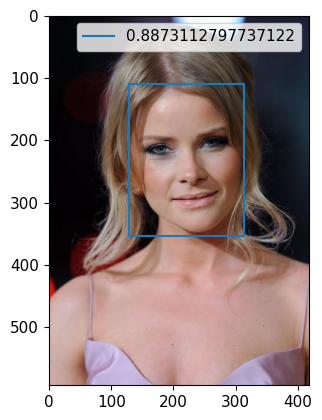

In [ ]:
plt.imshow(path_img)
plt.plot([x_min_1, x_min_1, x_max_1, x_max_1, x_min_1],[y_min_1, y_max_1, y_max_1, y_min_1, y_min_1])
#plt.plot([x_min_2, x_min_2, x_max_2, x_max_2, x_min_2],[y_min_2, y_max_2, y_max_2, y_min_2, y_min_2])
plt.legend(results[1][0][0])
plt.show()


In [ ]:
y_true = [113, 110, 211, 292]

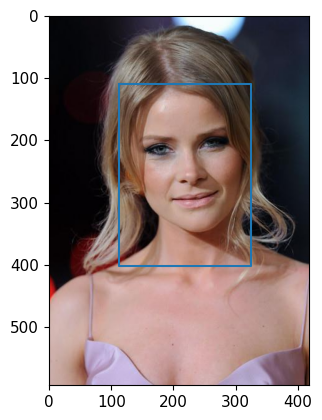

In [ ]:
plt.imshow(path_img)
plt.plot([y_true[0], y_true[0], y_true[2]+y_true[0], y_true[2]+y_true[0], y_true[0]],[y_true[1], y_true[3]+y_true[1], y_true[3]+y_true[1], y_true[1], y_true[1]])
plt.show()

In [ ]:
y_pred = [129, 110, 314, 353]

In [ ]:
true_area = y_true[2]*y_true[3]
true_area

61612

In [ ]:
pred_area = (y_pred[2]-y_pred[0])*(y_pred[3]-y_pred[1])
pred_area

44955

In [ ]:
correct_area = (min(y_pred[2], y_true[2]+y_true[0]) - max(y_pred[0], y_true[0])) * (min(y_pred[3], y_true[3]+y_true[1]) - max(y_pred[1], y_true[1]))
correct_area

44955

In [ ]:
iou = correct_area / (true_area + pred_area - correct_area)
iou

0.7296468220476531

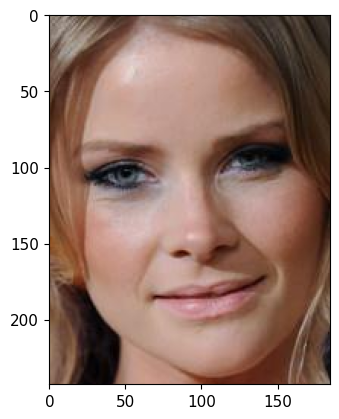

In [ ]:
im = Image.open('000010.jpg')
im_crop = im.crop((x_min_1, y_min_1, x_max_1, y_max_1))
plt.imshow(im_crop)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [ ]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

## Загружаю Facenet и набор случайных изображений, для которых предварительно были найдены личности

Для одной из личностей загружаю 2 фотографии, чтобф проверить, что нейросетевая сичтема способна распознать её

In [ ]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [ ]:
im_1 = Image.open('000002.jpg')
im_2 = Image.open('000006.jpg')
im_3 = Image.open('000008.jpg')
im_4 = Image.open('000010.jpg')
im_5 = Image.open('000025.jpg')
im_6 = Image.open('000045.jpg')
im_7 = Image.open('000092.jpg')
im_8 = Image.open('000102.jpg')
im_9 = Image.open('000137.jpg')
im_10 = Image.open('000155.jpg')
im_11 = Image.open('000190.jpg')
im_12 = Image.open('000209.jpg')
im_13 = Image.open('000252.jpg')
im_14 = Image.open('000270.jpg')
im_15 = Image.open('000357.jpg')

im_16 = Image.open('91c93bf0520d7c97e88047b3a9f71a8f.jpg')

In [ ]:
names = ['Emilia Fox', 'Eva Mendes', 'Mario Cantone', 'Anita Briem', 'Paul Kellerman', 'Jacqueline Bracamontes', 'Jordana Spiro', 'Nathan Followill','Graeme McDowell', 'Ariana Grande', 'Katia Zygouli', 'Don Adams', 'Judith Light', 'Missy Peregrym', 'Anna Gunn']

In [ ]:
images = [im_1, im_2, im_3, im_4, im_5, im_6, im_7, im_8, im_9, im_10, im_11, im_12, im_13, im_14, im_15, im_16]

In [ ]:
aligned = []
for im in images:
    x_aligned, prob = mtcnn(im, return_prob=True)
    print('Face detected with probability: {:8f}'.format(prob))
    aligned.append(x_aligned)


Face detected with probability: 0.999999
Face detected with probability: 0.999992
Face detected with probability: 0.999240
Face detected with probability: 0.996414
Face detected with probability: 0.999997
Face detected with probability: 0.998457
Face detected with probability: 0.999570
Face detected with probability: 0.999877
Face detected with probability: 0.999482
Face detected with probability: 0.998639
Face detected with probability: 0.999975
Face detected with probability: 0.983283
Face detected with probability: 0.999895
Face detected with probability: 0.999742
Face detected with probability: 0.998870
Face detected with probability: 0.999997


In [ ]:
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

In [ ]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]

In [ ]:
dist = min(dists[15][0:15])
name = names[dists[15].index(dist)]

## Проверяю, смогла ли нейросеть узнать личность актрисы

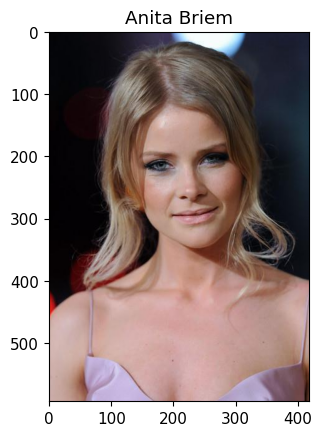

In [ ]:
plt.imshow(imread('000010.jpg'))
plt.title('Anita Briem')
plt.show()

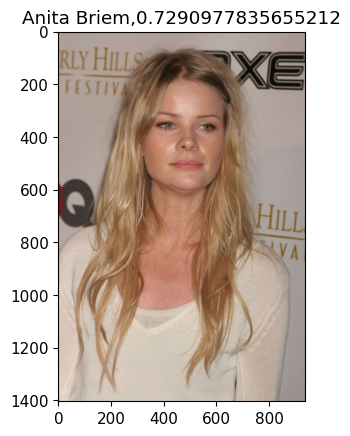

In [ ]:
plt.imshow(imread('91c93bf0520d7c97e88047b3a9f71a8f.jpg'))
plt.title(f'{name},{dist}')
plt.show()